# W207, Final Project
Spring, 2018

Team: Cameron Kennedy, Gaurav Khanna, Aaron Olson

# Predictive Modeling Notebook
Python Notebook 2 of 2

This notebook runs machine learning models to predict the data.

The other notebook (1 of 2) preps the data and extracts features.

In [31]:
#Import Required Libraries
#Data manipulation and visualization
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

#Models et al
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost
#from sklearn.preprocessing import CategoricalEncoder  #Not yet released!

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
# Load the data
df_fa = pd.read_pickle('features_all.pkl')  #Pickle format preserves file as python object
#df_tf = pd.read_pickle('tf.pkl')

In [33]:
df_fa['amount_paid_per_day'].replace([np.inf, -np.inf], -9999, inplace=True)
df_fa.head()

,city,bd,gender,registered_via,registration_init_time,is_churn,"(date_features, date, max_date)","(date_features, date, min_date)","(date_features, date, listening_tenure)","(within_days_7, num_unq, sum)",...,latest_plan_days,plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_transaction_month,latest_transaction_quarter,amount_paid_per_day
msno,,,,,,,,,,,,,,,,,,,,,
mKfgXQAmVeSKzN4rXW37qz0HbGCuYBspTBM3ONXZudg=,1,0,NaN,13,20170120,0,2017-02-24,2017-01-20,35,1,...,30,129,129,1,20170220,20170319,0,2,1,4.300000
AFcKYsrudzim8OFa+fL/c9g5gZabAbhaJnoM0qmlJfo=,1,0,NaN,13,20160907,0,2017-02-27,2016-09-07,173,228,...,30,129,129,1,20170207,20170306,0,2,1,4.300000
qk4mEZUYZq+4sQE7bzRYKc5Pvj+Xc7Wmu25DrCzltEU=,1,0,NaN,13,20160902,0,2017-02-26,2016-09-02,177,243,...,30,129,129,1,20170202,20170301,0,2,1,4.300000
G2UGNLph2J6euGmZ7WIa1+Kc+dPZBJI0HbLPu5YtrZw=,1,0,NaN,13,20161028,0,2017-02-28,2016-10-28,123,121,...,30,149,149,1,20170228,20170327,0,2,1,4.966667
EqSHZpMj5uddJvv2gXcHvuOKFOdS5NN6RalHfzEhhaI=,1,0,NaN,13,20161004,0,2016-10-26,2016-10-04,22,14,...,30,129,129,1,20170204,20170303,0,2,1,4.300000


In [34]:
#df_tf.head()

In [35]:
#Some quick wrangling
#ONLY RUN THIS CELL ONCE!!  (else it will try to re-join and spit back an error)

#Fix column headers
df_fa.columns = df_fa.columns.map(''.join)

#Join in Transactions
#df_fa = df_fa.join(df_tf, how='inner')

#Drop erroring date fields
#FUTURE: Convert dates to Y, M, D  ######### IMPORTANT, DO THIS!!!!   ###########
#df_fa.drop('date_featuresdatemax_date', axis=1, inplace=True)
#df_fa.drop('date_featuresdatemin_date', axis=1, inplace=True)
#df_fa.drop('transaction_date', axis=1, inplace=True)
#df_fa.drop('membership_expire_date', axis=1, inplace=True)

#Convert gender variable (string) to dummy encoding
dummy = pd.get_dummies(df_fa['gender'])
df_fa = pd.concat([df_fa, dummy], axis=1)
df_fa.drop('gender', axis=1, inplace=True)

#Drop the msno (user id) column ... no longer needed with pkl file
#df_fa.drop('msno', axis=1, inplace=True)

In [36]:
#summary
df_fa.head()

,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatemax_date,date_featuresdatemin_date,date_featuresdatelistening_tenure,within_days_7num_unqsum,within_days_7num_unqmean,...,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_transaction_month,latest_transaction_quarter,amount_paid_per_day,female,male
msno,,,,,,,,,,,,,,,,,,,,,
mKfgXQAmVeSKzN4rXW37qz0HbGCuYBspTBM3ONXZudg=,1,0,13,20170120,0,2017-02-24,2017-01-20,35,1,1.000000,...,129,1,20170220,20170319,0,2,1,4.300000,0,0
AFcKYsrudzim8OFa+fL/c9g5gZabAbhaJnoM0qmlJfo=,1,0,13,20160907,0,2017-02-27,2016-09-07,173,228,32.571429,...,129,1,20170207,20170306,0,2,1,4.300000,0,0
qk4mEZUYZq+4sQE7bzRYKc5Pvj+Xc7Wmu25DrCzltEU=,1,0,13,20160902,0,2017-02-26,2016-09-02,177,243,34.714286,...,129,1,20170202,20170301,0,2,1,4.300000,0,0
G2UGNLph2J6euGmZ7WIa1+Kc+dPZBJI0HbLPu5YtrZw=,1,0,13,20161028,0,2017-02-28,2016-10-28,123,121,24.200000,...,149,1,20170228,20170327,0,2,1,4.966667,0,0
EqSHZpMj5uddJvv2gXcHvuOKFOdS5NN6RalHfzEhhaI=,1,0,13,20161004,0,2016-10-26,2016-10-04,22,14,7.000000,...,129,1,20170204,20170303,0,2,1,4.300000,0,0


In [37]:
#Output full features to csv file, for quick inspection as needed.
#df_fa.to_csv('df_fa.csv')

# Quick Exploratory Data Analysis

Text(0,0.5,'Mean Number of Unique listening Periods in the last 7 days')

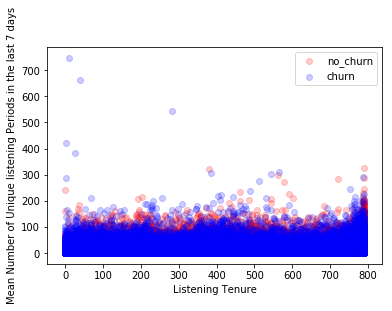

In [38]:
color = ['red', 'blue']
plt.figure()
for color, i, name in zip(color, [0,1], ['no_churn', 'churn']):
    plt.scatter(df_fa[df_fa['is_churn'] == i]['date_featuresdatelistening_tenure'],
               df_fa[df_fa['is_churn'] == i]['within_days_7num_unqmean'], color = color, alpha = 0.2, label = name)
plt.legend(loc = 'best')
plt.xlabel('Listening Tenure')
plt.ylabel('Mean Number of Unique listening Periods in the last 7 days')

Looking at the above plot, we can see that overall people who churn have low numbers of unique plays, meaning they aren't using the music service. We can also see a spike in number of unique plays for users who have a long tenure (>700 days). Intuitively this makes sense as users who are commited to the service (have used the service for a long time) may have developed lifestyle patterns where they use the service while driving/working/etc.

In [39]:
avg_price_no_churn = round(df_fa[df_fa['is_churn'] == 0]['amount_paid_per_day'].mean(), 2)
avg_price_is_churn = round(df_fa[df_fa['is_churn'] == 1]['amount_paid_per_day'].mean(), 2)
print('Avg cost/day for no churn: %.2f' %avg_price_no_churn)
print('Avg cost/day for churn: %.2f' %avg_price_is_churn)

Avg cost/day for no churn: 4.37
Avg cost/day for churn: 4.13


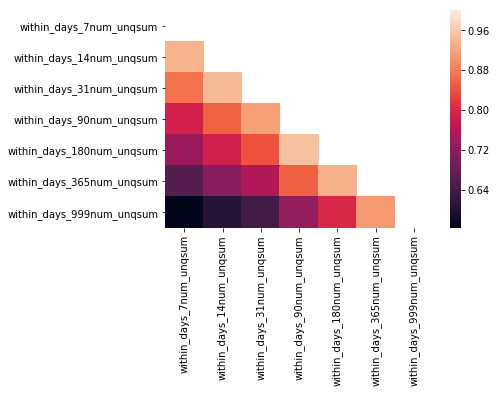

In [40]:
corr = df_fa.iloc[:, 8:99:15].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask)

In [41]:
mean_col = df_fa.iloc[:, 7:98:15].mean()
mean_col

date_featuresdatelistening_tenure    489.896266
within_days_7num_100mean              21.497445
within_days_14num_100mean             22.017982
within_days_31num_100mean             22.841633
within_days_90num_100mean             23.773736
within_days_180num_100mean            24.115101
within_days_365num_100mean            24.569486
dtype: float64

Text(0,0.5,'Number of Seconds (Avg) Listed during last 7 days')

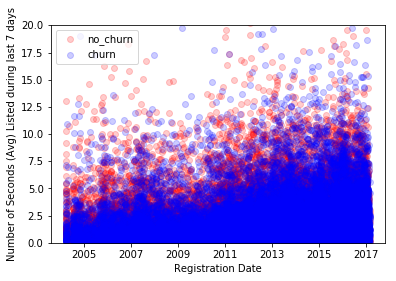

In [42]:
#plt.plot_date(reg_time, df_fa['within_days_7total_secsmean'], )
color = ['red', 'blue']
for color, i, name in zip(color, [0,1], ['no_churn', 'churn']):
    plt.plot_date(pd.to_datetime(df_fa[df_fa['is_churn'] == i]['registration_init_time'], format = '%Y%m%d'),
               df_fa[df_fa['is_churn'] == i]['within_days_7total_secsmean']/(60*60), color = color, alpha = 0.2, label = name)
plt.legend(loc = 'best')
plt.xlabel('Registration Date')
plt.ylim([0,20])
plt.ylabel('Number of Seconds (Avg) Listed during last 7 days')

This plot shows the Registration Date vs Avg seconds listened over past 7 days. The intent will be to change this to transaction date as this will more accurately reflect when the user ends service. We can see a trend in more churn occuring in the last 4 years of the dataset. This could be due to an increased level of users however (same proportion of churn).

<function matplotlib.pyplot.show>

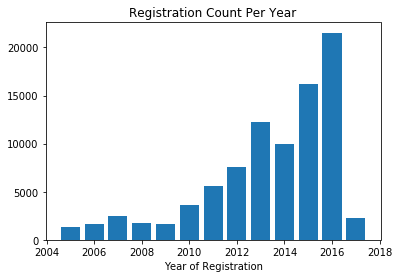

In [43]:
df_fa['registration_time'] = pd.to_datetime(df_fa['registration_init_time'], format = '%Y%m%d').map(lambda x: x.year)
reg_count = []
thirty_day_churn = []
for year in range(2005, 2018):
    reg_count.append(sum(df_fa['registration_time'] == year))
    thirty_day_churn.append(len(df_fa[(df_fa['registration_time'] == year) & (df_fa['date_featuresdatelistening_tenure'] < 30) & (df_fa['is_churn'] == 1)])/sum(df_fa['registration_time'] == year))
plt.bar(range(2005, 2018), reg_count)
plt.xlabel('Year of Registration')
plt.title('Registration Count Per Year')
plt.show

<function matplotlib.pyplot.show>

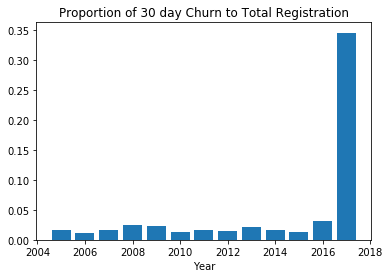

In [44]:
plt.bar(range(2005, 2018), thirty_day_churn)
plt.xlabel('Year')
plt.title('Proportion of 30 day Churn to Total Registration')
plt.show

This statistic shows that there is a high level of churn recently for users who are using a trial subscription, or who a very short duration subscription. From a business perspective this is concerning, because it means that a very high level of churn is occuring, and the problem needs to be solved to reduce churn levels back. The sharp spike may have been when the company started offering 30 days subscriptions or some other factor that has caused increased churn for customers with less than 30 day subscriptionps.

## More Feature Engineering

In [45]:
for col in df_fa.columns:
    print(col)

city
bd
registered_via
registration_init_time
is_churn
date_featuresdatemax_date
date_featuresdatemin_date
date_featuresdatelistening_tenure
within_days_7num_unqsum
within_days_7num_unqmean
within_days_7num_unqcount
within_days_7total_secssum
within_days_7total_secsmean
within_days_7num_25sum
within_days_7num_25mean
within_days_7num_50sum
within_days_7num_50mean
within_days_7num_75sum
within_days_7num_75mean
within_days_7num_985sum
within_days_7num_985mean
within_days_7num_100sum
within_days_7num_100mean
within_days_14num_unqsum
within_days_14num_unqmean
within_days_14num_unqcount
within_days_14total_secssum
within_days_14total_secsmean
within_days_14num_25sum
within_days_14num_25mean
within_days_14num_50sum
within_days_14num_50mean
within_days_14num_75sum
within_days_14num_75mean
within_days_14num_985sum
within_days_14num_985mean
within_days_14num_100sum
within_days_14num_100mean
within_days_31num_unqsum
within_days_31num_unqmean
within_days_31num_unqcount
within_days_31total_secssum


In [46]:
df_fa['last_listen_date'] = pd.to_datetime(df_fa['date_featuresdatemax_date'], format = '%Y%m%d')
df_fa['last_transaction'] = pd.to_datetime(df_fa['latest_transaction_date'], format = '%Y%m%d')
days = df_fa['last_listen_date'] - df_fa['last_transaction']
days.dt.days.mean()

19.779736628117096

# Predictive Modeling!

In [47]:
#Split data into a) train, dev, & test, b) data & labels

np.random.seed(5)  #Set so that % churn is somewhat consistent

#Train, Dev, Test splits: 60/25/15
train, devtest = train_test_split(df_fa, test_size=0.4)
dev, test = train_test_split(devtest, test_size=15/40)

#Check churn percentages
print('Check churn percentages:')
print('  All data, % churn: {:.1%}'.format(df_fa['is_churn'].sum() / df_fa['is_churn'].count()))
print('Train data, % churn: {:.1%}'.format(train['is_churn'].sum() / train['is_churn'].count()))
print('  Dev data, % churn: {:.1%}'.format(dev['is_churn'].sum() / dev['is_churn'].count()))
print(' Test data, % churn: {:.1%}'.format(test['is_churn'].sum() / test['is_churn'].count()))

#Split data / labels
train_labels = train['is_churn']
train_data = train.drop('is_churn', axis=1)
dev_labels = dev['is_churn']
dev_data = dev.drop('is_churn', axis=1)
test_labels = test['is_churn']
test_data = test.drop('is_churn', axis=1)

print('\nCheck data sizes:')
print('Train data / test: ', train_data.shape, train_labels.shape)
print('  Dev data / test: ', dev_data.shape, dev_labels.shape)
print(' Test data / test: ', test_data.shape, test_labels.shape)

#Baseline (if we guess all 0's, this is what we get)
print('\nBaseline Accuracy: {:.2%}'.format(1-(dev['is_churn'].sum() / dev['is_churn'].count())))

Check churn percentages:
  All data, % churn: 50.6%
Train data, % churn: 50.7%
  Dev data, % churn: 50.4%
 Test data, % churn: 50.2%

Check data sizes:
Train data / test:  (53126, 130) (53126,)
  Dev data / test:  (22136, 130) (22136,)
 Test data / test:  (13282, 130) (13282,)

Baseline Accuracy: 49.63%


In [48]:
#Scale / normalize data?  Consider doing this if needed.
for col in train_data.columns:
    print(col, type(train_data[col][0]))
#Migrate from pandas to numpy?  Also consider if needed.

city <class 'numpy.int64'>
bd <class 'numpy.int64'>
registered_via <class 'numpy.int64'>
registration_init_time <class 'numpy.int64'>
date_featuresdatemax_date <class 'pandas._libs.tslib.Timestamp'>
date_featuresdatemin_date <class 'pandas._libs.tslib.Timestamp'>
date_featuresdatelistening_tenure <class 'numpy.int64'>
within_days_7num_unqsum <class 'numpy.int64'>
within_days_7num_unqmean <class 'numpy.float64'>
within_days_7num_unqcount <class 'numpy.int64'>
within_days_7total_secssum <class 'numpy.float64'>
within_days_7total_secsmean <class 'numpy.float64'>
within_days_7num_25sum <class 'numpy.int64'>
within_days_7num_25mean <class 'numpy.float64'>
within_days_7num_50sum <class 'numpy.int64'>
within_days_7num_50mean <class 'numpy.float64'>
within_days_7num_75sum <class 'numpy.int64'>
within_days_7num_75mean <class 'numpy.float64'>
within_days_7num_985sum <class 'numpy.int64'>
within_days_7num_985mean <class 'numpy.float64'>
within_days_7num_100sum <class 'numpy.int64'>
within_days_7n

In [49]:
x = pd.to_numeric(train_data['date_featuresdatemax_date'])
print(x[0], train_data['date_featuresdatemax_date'][0])
type(train_data['date_featuresdatemax_date'][0])

1488153600000000000 2017-02-27 00:00:00


pandas._libs.tslib.Timestamp

In [50]:
train_data['registration_init_time'] = pd.to_numeric(train_data['registration_init_time'])
train_data['date_featuresdatemax_date'] = pd.to_numeric(train_data['date_featuresdatemax_date'])
train_data['date_featuresdatemin_date'] = pd.to_numeric(train_data['date_featuresdatemin_date'])
train_data['latest_transaction_date'] = pd.to_numeric(train_data['latest_transaction_date'])
train_data['registration_time'] = pd.to_numeric(train_data['registration_time'])
train_data['last_listen_date'] = pd.to_numeric(train_data['last_listen_date'])
train_data['latest_expire_date'] = pd.to_numeric(train_data['latest_expire_date'])
train_data['last_transaction'] = pd.to_numeric(train_data['last_transaction'])

dev_data['registration_init_time'] = pd.to_numeric(dev_data['registration_init_time'])
dev_data['date_featuresdatemax_date'] = pd.to_numeric(dev_data['date_featuresdatemax_date'])
dev_data['date_featuresdatemin_date'] = pd.to_numeric(dev_data['date_featuresdatemin_date'])
dev_data['latest_transaction_date'] = pd.to_numeric(dev_data['latest_transaction_date'])
dev_data['registration_time'] = pd.to_numeric(dev_data['registration_time'])
dev_data['last_listen_date'] = pd.to_numeric(dev_data['last_listen_date'])
dev_data['latest_expire_date'] = pd.to_numeric(dev_data['latest_expire_date'])
dev_data['last_transaction'] = pd.to_numeric(dev_data['last_transaction'])

test_data['registration_init_time'] = pd.to_numeric(test_data['registration_init_time'])
test_data['date_featuresdatemax_date'] = pd.to_numeric(test_data['date_featuresdatemax_date'])
test_data['date_featuresdatemin_date'] = pd.to_numeric(test_data['date_featuresdatemin_date'])
test_data['latest_transaction_date'] = pd.to_numeric(test_data['latest_transaction_date'])
test_data['registration_time'] = pd.to_numeric(test_data['registration_time'])
test_data['last_listen_date'] = pd.to_numeric(test_data['last_listen_date'])
test_data['latest_expire_date'] = pd.to_numeric(test_data['latest_expire_date'])
test_data['last_transaction'] = pd.to_numeric(test_data['last_transaction'])

In [51]:
### NB Attempt ###
clf_NB_Gauss = GaussianNB()
clf_NB_Gauss.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_NB_Gauss.score(dev_data, dev_labels)))
#Awful!

Accuracy: 54.83%


In [52]:
### KNN Attempt ###
clf_neigh = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)  #Accuracy plateaus around n=10, all 0's
clf_neigh.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_neigh.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_neigh.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_neigh.predict(dev_data)))
#Bust.  Predicts all 0's

Accuracy: 83.22%
             precision    recall  f1-score   support

          0       0.79      0.89      0.84     10986
          1       0.88      0.77      0.82     11150

avg / total       0.84      0.83      0.83     22136

[[9824 1162]
 [2552 8598]]


In [53]:
### Random Forest Attempt ###
clf_RF = RandomForestClassifier(n_jobs=-1, random_state=12, class_weight={0: 1, 1: 1}, criterion='gini')
clf_RF.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_RF.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_RF.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_RF.predict(dev_data)))

Accuracy: 95.67%
             precision    recall  f1-score   support

          0       0.95      0.96      0.96     10986
          1       0.96      0.95      0.96     11150

avg / total       0.96      0.96      0.96     22136

[[10562   424]
 [  534 10616]]


In [54]:
#### SVM Attempts ###
clf_SVM = svm.SVC(kernel='rbf', C=1, max_iter=640, probability = True)  #max_iter=635 gives 6% accuracy ... need new approach / tuning
clf_SVM.fit(train_data, train_labels)
print('\nAccuracy: {:.2%}'.format(clf_SVM.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_SVM.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_SVM.predict(dev_data)))

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=640).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)



Accuracy: 50.37%


C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00     10986
          1       0.50      1.00      0.67     11150

avg / total       0.25      0.50      0.34     22136

[[    0 10986]
 [    0 11150]]


In [55]:
clf_XGB = xgboost.XGBClassifier(n_jobs=-1, reg_lambda=600)
clf_XGB.fit(train_data, train_labels)
print('\nAccuracy: {:.2%}'.format(clf_XGB.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_XGB.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_XGB.predict(dev_data)))


Accuracy: 95.53%
             precision    recall  f1-score   support

          0       0.96      0.95      0.95     10986
          1       0.95      0.96      0.96     11150

avg / total       0.96      0.96      0.96     22136

[[10411   575]
 [  415 10735]]


C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[10411   575]
 [  415 10735]]
Normalized confusion matrix
[[0.95 0.05]
 [0.04 0.96]]


C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


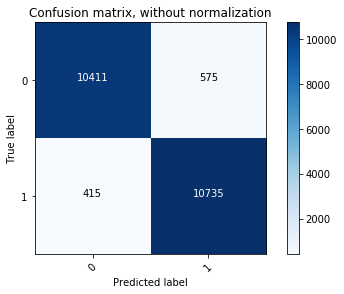

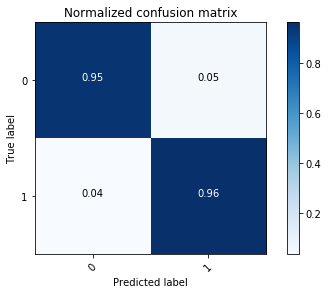

In [56]:
#Plot accuracy results ('stole' this code from sklearn documentation)
clf_current = clf_XGB

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [0, 1]
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(dev_labels, clf_current.predict(dev_data))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [57]:
def calibrate_model(buckets, probs, pred, labels, correct, total):
    """ Fit a Bernoulli Naive Bayes algorithm and count predicted
    probability into buckets of defined probability in order to 
    compare calibration of model - looking at posterior probability    
    and accuracy. 
    
    Args:
        buckets - list of floats to define probability buckets
        correct - count by bucket threshold of correctly identified
            images
        total - count by bucket threshold of all images correlated
    Returns:
        N/A - Matrix passed through function
    
    """
    # Loop over length of probability array 
    index = 0
    for row in probs:
        i = 0
        # Loop through bucket thresholds
        for bucket in buckets:
            # Determine if probability falls within bucket
            # Compute total and correct by bucket
            if row.max() <= bucket:
                total[i] = total[i] + 1
                if labels[index] == pred[index]:
                    correct[i] = correct[i] + 1
            i = i + 1
        index = index + 1

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 
           0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]
probs = clf_XGB

calibrate_model(buckets, clf_XGB.predict_proba(dev_data), clf_XGB.predict(dev_data), dev_labels, correct, total)
# Print bucket, total and accuracy
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %5d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


p(pred) <= 0.5000000000000    total =     0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  3261    accuracy = 0.780
p(pred) <= 0.9990000000000    total = 22136    accuracy = 0.955
p(pred) <= 0.9999900000000    total = 22136    accuracy = 0.955
p(pred) <= 0.9999999000000    total = 22136    accuracy = 0.955
p(pred) <= 0.9999999990000    total = 22136    accuracy = 0.955
p(pred) <= 0.9999999999900    total = 22136    accuracy = 0.955
p(pred) <= 0.9999999999999    total = 22136    accuracy = 0.955
p(pred) <= 1.0000000000000    total = 22136    accuracy = 0.955


C:\Users\AOlson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


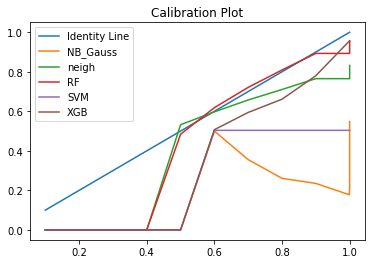

In [58]:
models = [clf_NB_Gauss, clf_neigh, clf_RF, clf_SVM, clf_XGB]
model_names = ['NB_Gauss', 'neigh', 'RF', 'SVM', 'XGB']
buckets = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 
           0.99999999999, 0.9999999999999, 1.0]
plt.plot(buckets, buckets, label = 'Identity Line')
for model_name, model in zip(model_names, models):
    correct = [0 for i in buckets]
    total = [0 for i in buckets]
    calibrate_model(buckets, model.predict_proba(dev_data), model.predict(dev_data), dev_labels, correct, total)
    accuracy = []
    for i in range(len(buckets)):
        if (total[i] > 0): accuracy.append(correct[i] / total[i])
        else: accuracy.append(0.0)
    plt.plot(buckets, accuracy, label = model_name)
plt.legend(loc = 'best')
plt.title('Calibration Plot')
plt.show()

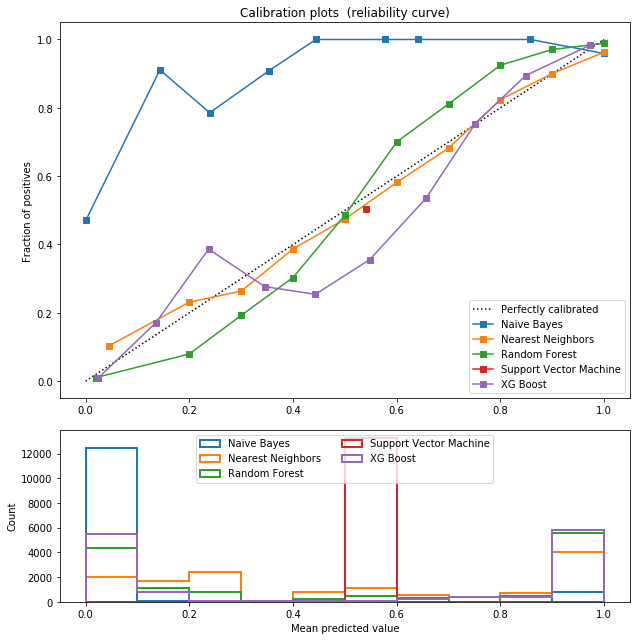

In [61]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, log_loss)

# <!-- collapse=True -->
plt.figure(figsize=(9, 9))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_NB_Gauss, 'Naive Bayes'), 
                  (clf_neigh, 'Nearest Neighbors'),
                  (clf_RF, 'Random Forest'),
                  (clf_SVM, 'Support Vector Machine'),
                  (clf_XGB, 'XG Boost')]:
    #clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(test_data)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(test_data)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(test_labels, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

In [70]:
print('\nCheck data sizes:')
print('Train data / test: ', train_data.shape, train_labels.shape)
print('  Dev data / test: ', dev_data.shape, dev_labels.shape)
print(' Test data / test: ', test_data.shape, test_labels.shape)

train_data.head()


Check data sizes:
Train data / test:  (53126, 130) (53126,)
  Dev data / test:  (22136, 130) (22136,)
 Test data / test:  (13282, 130) (13282,)


,city,bd,registered_via,registration_init_time,date_featuresdatemax_date,date_featuresdatemin_date,date_featuresdatelistening_tenure,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,...,latest_expire_date,latest_is_cancel,latest_transaction_month,latest_transaction_quarter,amount_paid_per_day,female,male,registration_time,last_listen_date,last_transaction
msno,,,,,,,,,,,,,,,,,,,,,
A/2RJwq5GZLYxtolSb+mC6N1ArQMJKEJVjCyQs/a4nU=,1,0,3,20130107,1488153600000000000,1482364800000000000,67,152,38.00,4,...,20170327,0,2,1,4.966667,0,0,2013,1488153600000000000,1487980800000000000
axkJiaPNbv1TriLtM74GWUFUdfvI8UDWGFEBGkWOfok=,13,30,3,20121216,1487894400000000000,1440633600000000000,547,285,95.00,3,...,20170228,0,2,1,2.977778,1,0,2012,1487894400000000000,1472428800000000000
zMOD2XJjPpeuU4HZhV9EQRLK9LdJT7X9ZyzzQwKMI+o=,1,0,7,20111230,1482624000000000000,1420243200000000000,722,63,15.75,4,...,20170106,1,2,1,4.966667,0,0,2011,1482624000000000000,1483660800000000000
hjWTK8xe6DtBT9++majwP940HEgp3e7Hsqp7OHaib4M=,9,28,9,20131014,1487289600000000000,1420156800000000000,777,27,9.00,3,...,20170214,1,2,1,4.966667,0,1,2013,1487289600000000000,1487030400000000000
GIzQXJsOmSil2nGxjsx2v8ChaMpsoXd5PzHxS6TxVzo=,6,32,7,20151025,1488240000000000000,1446076800000000000,488,33,8.25,4,...,20170325,0,2,1,3.300000,1,0,2015,1488240000000000000,1487980800000000000


In [67]:
clf_isotonic = CalibratedClassifierCV(clf_XGB, cv = 2, method = 'isotonic')
clf_isotonic.fit(train_data, train_labels)
prob_pos_isotonic = clf_isotonic.predict_proba(test_data)

clf_sigmoid = CalibratedClassifierCV(clf_XGB, cv = 2, method = 'sigmoid')
clf_sigmoid.fit(train_data, train_labels)
prob_pos_sigmoid = clf_isotonic.predict_proba(test_data)

ValueError: feature_names mismatch: ['city', 'bd', 'registered_via', 'registration_init_time', 'date_featuresdatemax_date', 'date_featuresdatemin_date', 'date_featuresdatelistening_tenure', 'within_days_7num_unqsum', 'within_days_7num_unqmean', 'within_days_7num_unqcount', 'within_days_7total_secssum', 'within_days_7total_secsmean', 'within_days_7num_25sum', 'within_days_7num_25mean', 'within_days_7num_50sum', 'within_days_7num_50mean', 'within_days_7num_75sum', 'within_days_7num_75mean', 'within_days_7num_985sum', 'within_days_7num_985mean', 'within_days_7num_100sum', 'within_days_7num_100mean', 'within_days_14num_unqsum', 'within_days_14num_unqmean', 'within_days_14num_unqcount', 'within_days_14total_secssum', 'within_days_14total_secsmean', 'within_days_14num_25sum', 'within_days_14num_25mean', 'within_days_14num_50sum', 'within_days_14num_50mean', 'within_days_14num_75sum', 'within_days_14num_75mean', 'within_days_14num_985sum', 'within_days_14num_985mean', 'within_days_14num_100sum', 'within_days_14num_100mean', 'within_days_31num_unqsum', 'within_days_31num_unqmean', 'within_days_31num_unqcount', 'within_days_31total_secssum', 'within_days_31total_secsmean', 'within_days_31num_25sum', 'within_days_31num_25mean', 'within_days_31num_50sum', 'within_days_31num_50mean', 'within_days_31num_75sum', 'within_days_31num_75mean', 'within_days_31num_985sum', 'within_days_31num_985mean', 'within_days_31num_100sum', 'within_days_31num_100mean', 'within_days_90num_unqsum', 'within_days_90num_unqmean', 'within_days_90num_unqcount', 'within_days_90total_secssum', 'within_days_90total_secsmean', 'within_days_90num_25sum', 'within_days_90num_25mean', 'within_days_90num_50sum', 'within_days_90num_50mean', 'within_days_90num_75sum', 'within_days_90num_75mean', 'within_days_90num_985sum', 'within_days_90num_985mean', 'within_days_90num_100sum', 'within_days_90num_100mean', 'within_days_180num_unqsum', 'within_days_180num_unqmean', 'within_days_180num_unqcount', 'within_days_180total_secssum', 'within_days_180total_secsmean', 'within_days_180num_25sum', 'within_days_180num_25mean', 'within_days_180num_50sum', 'within_days_180num_50mean', 'within_days_180num_75sum', 'within_days_180num_75mean', 'within_days_180num_985sum', 'within_days_180num_985mean', 'within_days_180num_100sum', 'within_days_180num_100mean', 'within_days_365num_unqsum', 'within_days_365num_unqmean', 'within_days_365num_unqcount', 'within_days_365total_secssum', 'within_days_365total_secsmean', 'within_days_365num_25sum', 'within_days_365num_25mean', 'within_days_365num_50sum', 'within_days_365num_50mean', 'within_days_365num_75sum', 'within_days_365num_75mean', 'within_days_365num_985sum', 'within_days_365num_985mean', 'within_days_365num_100sum', 'within_days_365num_100mean', 'within_days_999num_unqsum', 'within_days_999num_unqmean', 'within_days_999num_unqcount', 'within_days_999total_secssum', 'within_days_999total_secsmean', 'within_days_999num_25sum', 'within_days_999num_25mean', 'within_days_999num_50sum', 'within_days_999num_50mean', 'within_days_999num_75sum', 'within_days_999num_75mean', 'within_days_999num_985sum', 'within_days_999num_985mean', 'within_days_999num_100sum', 'within_days_999num_100mean', 'Total_plan_days', 'Total_amount_paid', 'payment_method_id', 'latest_plan_days', 'plan_list_price', 'latest_amount_paid', 'latest_auto_renew', 'latest_transaction_date', 'latest_expire_date', 'latest_is_cancel', 'latest_transaction_month', 'latest_transaction_quarter', 'amount_paid_per_day', 'female', 'male', 'registration_time', 'last_listen_date', 'last_transaction'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129']
expected latest_amount_paid, within_days_999total_secssum, within_days_14num_75sum, within_days_31num_75sum, within_days_365num_50sum, latest_transaction_month, within_days_90num_25sum, within_days_31num_50mean, within_days_90num_75mean, latest_plan_days, within_days_180num_unqsum, within_days_365num_100mean, within_days_90num_unqcount, within_days_180num_25mean, within_days_999num_50sum, female, city, plan_list_price, within_days_14total_secssum, within_days_31num_unqsum, within_days_7num_75mean, within_days_7num_100sum, within_days_31num_unqmean, within_days_365num_75sum, within_days_365num_50mean, within_days_180total_secsmean, within_days_365num_unqsum, within_days_180num_75sum, within_days_180num_985sum, within_days_180num_50sum, within_days_7num_unqsum, within_days_180num_985mean, within_days_90num_985sum, within_days_31num_75mean, within_days_999num_unqmean, within_days_999num_75sum, date_featuresdatemax_date, date_featuresdatelistening_tenure, within_days_7num_25mean, latest_transaction_quarter, within_days_365num_985mean, within_days_365num_75mean, within_days_999num_100sum, within_days_7num_50sum, within_days_999num_25sum, within_days_90num_unqmean, within_days_31num_100sum, last_listen_date, within_days_180num_unqcount, within_days_365num_25mean, within_days_31num_985mean, within_days_999num_985mean, within_days_999num_75mean, within_days_999num_985sum, within_days_14num_100sum, latest_transaction_date, within_days_31total_secssum, registration_time, within_days_7num_25sum, within_days_7num_985mean, within_days_7total_secsmean, within_days_14num_75mean, male, within_days_31num_25sum, latest_auto_renew, within_days_90total_secssum, within_days_7num_50mean, within_days_999num_25mean, within_days_31num_985sum, bd, within_days_14num_unqcount, within_days_180num_25sum, within_days_365num_unqmean, within_days_180total_secssum, within_days_7total_secssum, within_days_180num_50mean, within_days_14num_985sum, within_days_14num_100mean, within_days_7num_unqmean, within_days_180num_75mean, latest_expire_date, within_days_90num_unqsum, payment_method_id, within_days_31num_unqcount, within_days_31num_100mean, within_days_7num_75sum, within_days_14num_25mean, within_days_14num_985mean, registered_via, registration_init_time, within_days_365num_unqcount, within_days_90num_25mean, within_days_90num_50sum, within_days_14num_50sum, within_days_365total_secsmean, within_days_999num_unqsum, within_days_365total_secssum, within_days_90num_75sum, within_days_180num_100sum, within_days_7num_985sum, within_days_365num_100sum, Total_amount_paid, within_days_7num_100mean, within_days_90num_100mean, within_days_31num_50sum, within_days_14total_secsmean, within_days_31num_25mean, within_days_90total_secsmean, within_days_180num_100mean, within_days_14num_50mean, within_days_14num_unqmean, amount_paid_per_day, date_featuresdatemin_date, within_days_90num_985mean, within_days_365num_985sum, Total_plan_days, within_days_14num_unqsum, latest_is_cancel, within_days_14num_25sum, within_days_999total_secsmean, within_days_999num_100mean, within_days_7num_unqcount, last_transaction, within_days_999num_50mean, within_days_31total_secsmean, within_days_999num_unqcount, within_days_365num_25sum, within_days_90num_100sum, within_days_180num_unqmean, within_days_90num_50mean in input data
training data did not have the following fields: f30, f84, f12, f39, f31, f52, f77, f88, f106, f93, f20, f82, f9, f113, f101, f58, f54, f83, f129, f4, f120, f42, f80, f103, f68, f51, f6, f14, f110, f60, f74, f85, f121, f43, f44, f72, f71, f87, f37, f108, f89, f45, f70, f3, f34, f97, f102, f128, f96, f2, f90, f67, f27, f53, f15, f63, f16, f0, f50, f46, f25, f124, f57, f38, f13, f86, f94, f105, f55, f23, f107, f59, f123, f48, f99, f36, f116, f26, f81, f56, f115, f127, f32, f78, f125, f61, f69, f92, f109, f118, f7, f41, f49, f114, f8, f19, f111, f119, f29, f28, f33, f126, f117, f18, f66, f104, f65, f76, f75, f79, f112, f21, f91, f1, f17, f35, f10, f95, f73, f98, f11, f64, f100, f22, f47, f24, f40, f122, f5, f62

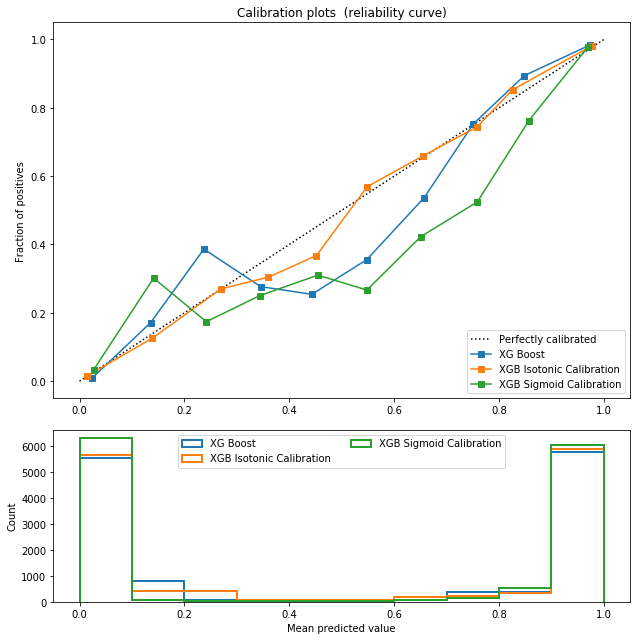

In [64]:
# <!-- collapse=True -->
plt.figure(figsize=(9, 9))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(clf_XGB, 'XG Boost'),
                 (clf_isotonic, 'XGB Isotonic Calibration'),
                 (clf_sigmoid, 'XGB Sigmoid Calibration')]:
    #clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(test_data)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(test_data)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(test_labels, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

# Initial Insights and Takeaways

Here are our initial insights and commentary from our analysis:

**Data Preparation and Feature Extraction**

* The team spent most of its time on data acquisition and feature extraction, and less on modeling. We think this mimics real-world situations.
* Our initial data set was ~30GB, with our largest table containing 392 million rows (and 9 columns). Because of its large size, we chose to use 1% of the data to build our predictive model. In doing so, we ensured our primary feature to predict, user churn, had approximately the same ratio in our 1% data set as we saw in the full data. In both cases, roughly 6% of users churned, which we noted as an imbalanced data set that we will address in our modeling. Our final data set contained ~50K users.
* Because our churn data was by user (the user column is labeled 'msno'), we extracted several features from both the user_logs table and the transactions table, and in both cases we aggregated them at the user level. Most of our aggregations were sums, means, and counts. We also incorporated 'recency' into our features, that is, we used aggregations relative to a user's last use of the service (e.g., average number of songs played in the past 7, 14, 30, etc. days).
* Though not shown, the team performed several data audits of individual users to ensure the aggregations and other data preparations matched manual calculations of the same data.

**Modeling**

* The team performed a brief exploratory data analysis as seen above, but it is by no means intended to be comprehensive.
* The team split the data into training, dev, and test sets with a ratio of 60/25/15.
* The team tried several models: Gaussian Naive Bayes, K Nearest Neighbors, Random Forest, Support Vector Machine, and XGBoost. Of these, XGBoost and Random Forests performed best. Both had high accuracies (96.4% and 97.1%, respectively), and they had recalls (currently) at 78% and 55%, respectively.
* We're placing an emphasis on recall as our primary metric, moreso than accuracy. Our thinking here is that accuracy has a 'baseline' of 94% (predicting all 0's, i.e., no users churn), making our current best prediction of ~97% much less impressive. Moreover, we're okay with some false positives but would prefer to minimize false negatives. In other words, we'd rather predict a few customers as likely to churn when in fact they would actually stay (false positives) as opposed to predicting customers who would stay but who actually churn (false negatives). This assumption presumes that the long-term cost of keeping customers (for example, the cost of offering discounts) is less than the long-term loss associated with losing customers. Admittedly, more domain knowledge would be required to validate this assumption, but we consider that validation beyond the scope of the project.
* We're not entirely assuming that all reasons for the churn are captured in the data set we have (Usage and Transactions). We're believing that some are and we are biased to find churn particularly dependent on those reasons (features). This helps the business as metrics captured in the data can be influenced more easily than external factors. Examples of these features are cost/day in the plan and the user tenure.

**Next Steps**

We've identified several items before the final submission:

* Feature extraction: We plan to look at additional features we can extract from the data. Ideas include:
    * Changes in recent behavior compared to long-term behavior (e.g., # of songs heard in the past 7 days vs. the past 180 days)
    * Comparing the transaction metrics between the last 2 transactions
    * Differences in transaction activity vs. usage (e.g., customers who might still be paying monthly fees but not listening to music)
    * Scaling / normalizing features
    * Better handling of date features
* Model tweaking: Adjusting model parameters and employing GridSearch to automate this process.
* Provide more documentation of the approach and analysis:
    * Writing more about the hypotheses of our features
    * Including our data discription (largely what we provided a couple weeks ago that lists our primary tables and feature names)
* Improving code where possible for efficiency, readability, commenting, and function descriptions.

We look forward to continuing to work on the project and welcome any feedback!